# Task 1: Preprocess and Explore the Data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
import sys
import os
sys.path.append(os.path.abspath("../Scripts"))

import warnings
warnings.filterwarnings('ignore')

In [23]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
tickers = ['TSLA', 'BND', 'SPY']
start ='2015-07-01'
end = '2025-07-31'

In [24]:
from load_stock_data import *

In [25]:
df = download_stock_data(tickers, start, end)
print(f"Downloading {tickers} from {start} to {end} ...")
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437


In [26]:
# Suppose df is your stock prices DataFrame
clean_df = inspect_and_clean_df(df, method="linear")
display(clean_df.head())

Data types of each column:
TSLA    float64
BND     float64
SPY     float64
dtype: object

 Missing values per column:
TSLA    0
BND     0
SPY     0
dtype: int64

 Cleaned using 'linear' method.


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437


In [27]:
print("\nAfter forward fill:")
display(handle_missing_values(df, method="ffill").head())

print("\nAfter filling missing with 0:")
display(handle_missing_values(df, method="zero").head())

print("\nAfter linear interpolation:")
display(handle_missing_values(df, method="interpolate").head())

print("\nAfter dropping rows with missing values:")
display(handle_missing_values(df, method="drop").head())


After forward fill:


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437



After filling missing with 0:


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437



After linear interpolation:


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437



After dropping rows with missing values:


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TSLA,2535.0,131.963002,120.914904,9.578000,18.967667,94.571335,236.761665,479.859985
BND,2535.0,68.469188,4.554601,60.779125,64.654346,67.604858,71.891136,77.318253
SPY,2535.0,334.193732,126.427704,155.869751,230.083199,305.264435,420.350555,637.099976


In [29]:
# Example usage
df = clean_and_align(df)

Downloaded Data shape: (2535, 3)


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816727,174.917130
2015-07-02,18.667999,60.967133,174.756973
2015-07-06,18.648001,61.177589,174.259567
2015-07-07,17.858667,61.237717,175.355469
2015-07-08,16.997334,61.410618,172.413437


In [46]:
# Example usage:
returns_df = compute_returns(df)[0]
print("Computed Returns:")
display(returns_df.head())

Computed Returns:


,TSLA_Simple_Returns,BND_Simple_Returns,SPY_Simple_Returns,TSLA_Log_Returns,BND_Log_Returns,SPY_Log_Returns
Date,,,,,,
2015-07-02,0.040386,0.002473,-0.000916,0.039592,0.002470,-0.000916
2015-07-06,-0.001071,0.003452,-0.002846,-0.001072,0.003446,-0.002850
2015-07-07,-0.042328,0.000983,0.006289,-0.043250,0.000982,0.006269
2015-07-08,-0.048231,0.002823,-0.016778,-0.049432,0.002819,-0.016920
2015-07-09,0.011610,-0.003305,0.001809,0.011543,-0.003311,0.001808


In [39]:
# Example usage:
log_returns_df = compute_returns(df)[1]
print("Computed Returns:")
display(log_returns_df.head())

Computed Returns:


,TSLA_Log_Returns,BND_Log_Returns,SPY_Log_Returns
Date,,,
2015-07-02,0.039592,0.002470,-0.000916
2015-07-06,-0.001072,0.003446,-0.002850
2015-07-07,-0.043250,0.000982,0.006269
2015-07-08,-0.049432,0.002819,-0.016920
2015-07-09,0.011543,-0.003311,0.001808


In [40]:
# Example usage:
summary_stats = calculate_annualized_stats(returns_df)
display(summary_stats)


Annualized return and volatility:


,Annualized Mean Return,Annualized Volatility
TSLA_Simple_Returns,0.460690,0.591887
BND_Simple_Returns,0.019599,0.054919
SPY_Simple_Returns,0.144844,0.182407
TSLA_Log_Returns,0.286220,0.590156
BND_Log_Returns,0.018088,0.055016
SPY_Log_Returns,0.128134,0.182810


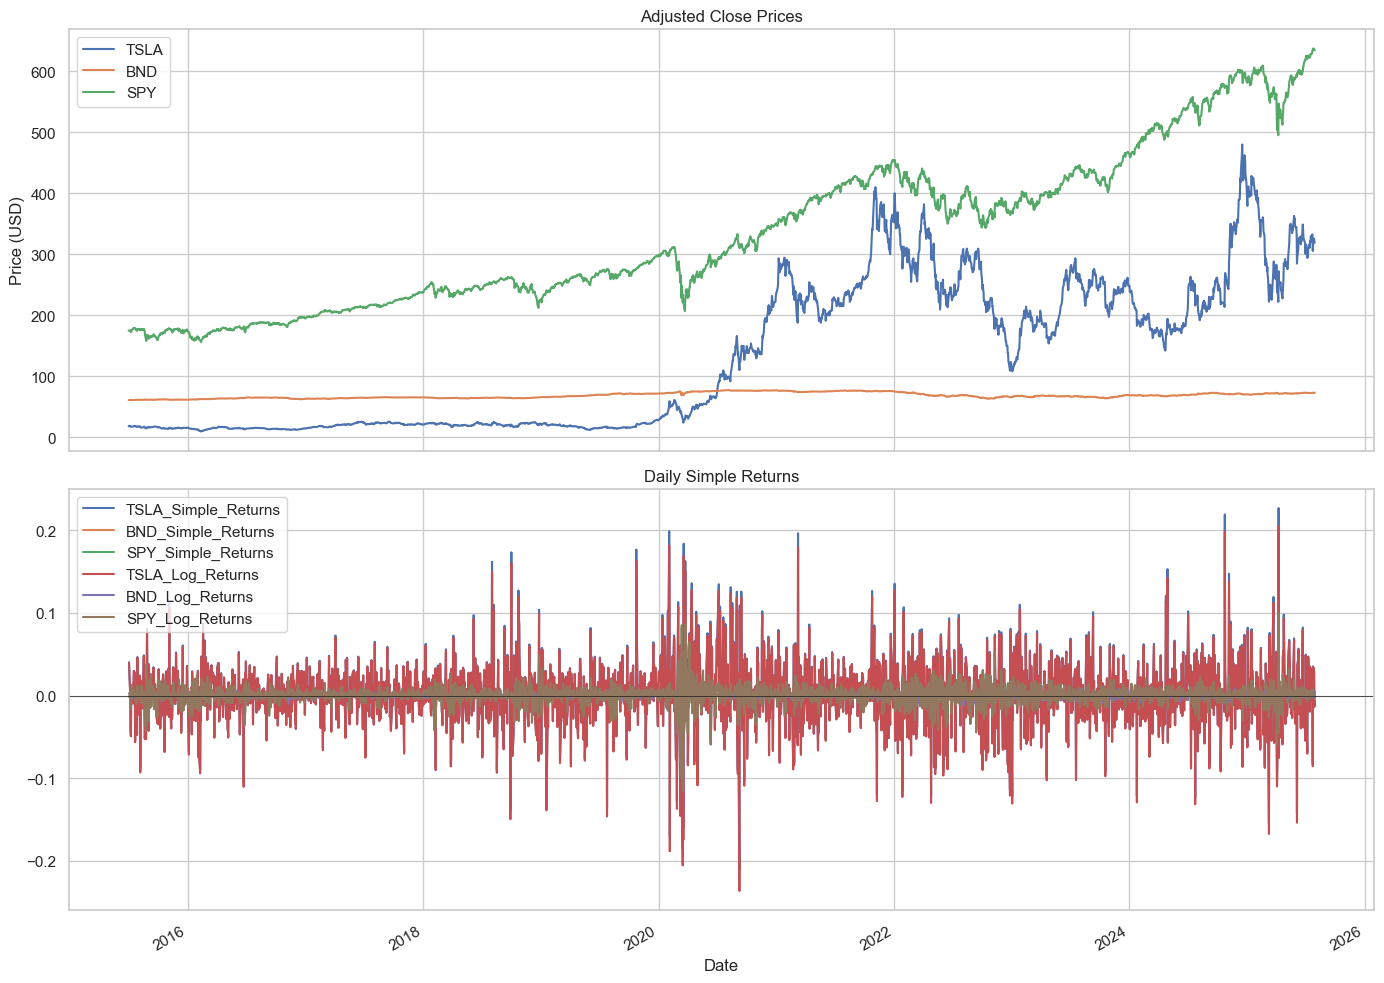

In [41]:
# Example usage
plot_prices_and_returns(df, returns_df)

In [47]:
# Example usage
outlier_days = detect_outlier_days(log_returns, threshold=3)
display(outlier_days.head())

NameError: name 'log_returns' is not defined